# California Housing - Machine Learning

O propósito deste estudo é preparar os dados do dataset abaixo para criação de modelos de regressão usando Random Forest, XGBoost e LightGBM

## Dicionário de dados (em inglês)

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house with reference to ocean/sea

<span style="font-family: Arial Narrow, Arial, sans-serif; float:right;font-size: 11px; clear:both;">Fonte: <a href="https://www.kaggle.com/datasets/camnugent/california-housing-prices">Kaggle - California Housing Prices</a></span>

## 0) Imports

Import das bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

## 0.1) Configurações

In [2]:
%matplotlib inline

warnings.filterwarnings("ignore")

RANDOM_STATE = 73

# 1) Carga do dataset

In [3]:
df = pd.read_csv('housing.csv')

## 1.1) Dicionário de Dados

| # | Coluna | Descrição |
|---:|:-------------|:-----------|
| 1 | longitude | Longitude do Distrito |
| 2 | latitude | Latitude do Distrito |
| 3 | housing_median_age | Idade Média da Casa no Distrito |
| 4 | total_rooms | Total de Cômodos no Distrito |
| 5 | total_bedrooms | Total de Dormitórios no Distrito |
| 6 | population | População no Distrito |
| 7 | households | Total de Agragados Familiares no Distrito |
| 8 | median_income | Renda Média no Distrito |
| 9 | median_house_value | Valor Médio da Casa no Distrito |
| 10 | ocean_proximity | Distância Até a Praia |


# 2) Análise Exploratória dos dados

# 2.1) Linhas iniciais do dataset

In [4]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.2) Estatísticas do dataset

### 2.2.1) Variáveis numéricas

In [5]:
display(df.shape)
display(df.info())

(20640, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### 2.2.2) Variáveis categóricas

In [7]:
df['ocean_proximity'].value_counts(normalize = False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df['ocean_proximity'].value_counts(normalize = True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

### 2.2.3) Remoção de missing-values

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
(207 / df.shape[0]) * 100

1.002906976744186

A variável __total_bedrooms__ apresenta 207 missing values, vamos dropar essas linhas, já que representa pouco mais de 1% do total de dados.

In [11]:
df.dropna(inplace = True)

## 2.3) Análises Gráficas

### 2.3.1) housing_median_age

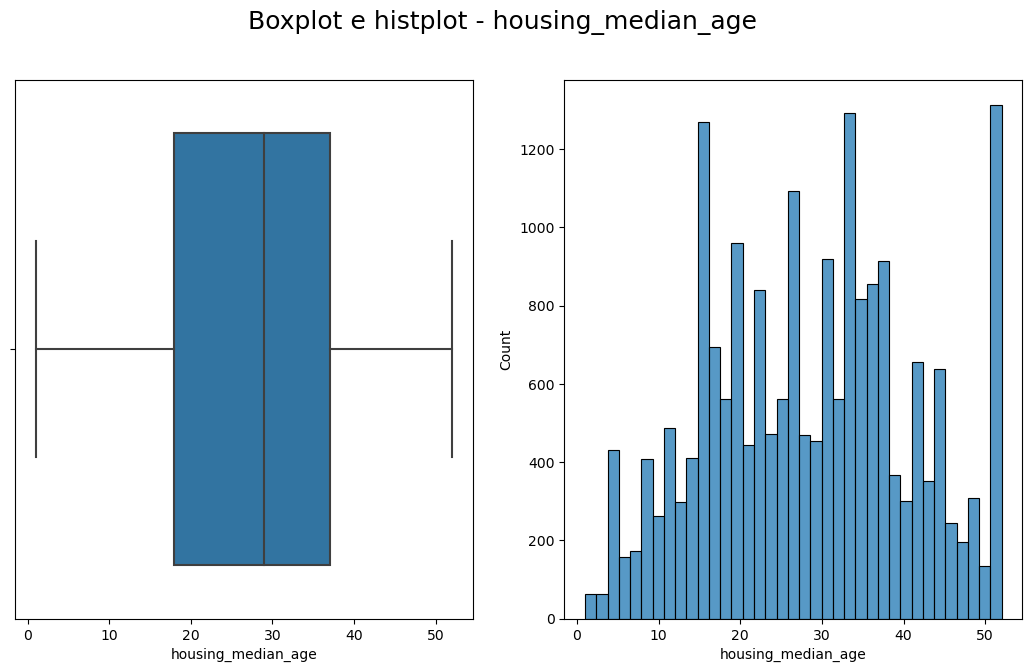

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - housing_median_age', fontsize = 18)

sns.boxplot(x = df['housing_median_age'], ax = ax1)
sns.histplot(x = df['housing_median_age'], ax = ax2)

plt.show()

### 2.3.2) total_rooms

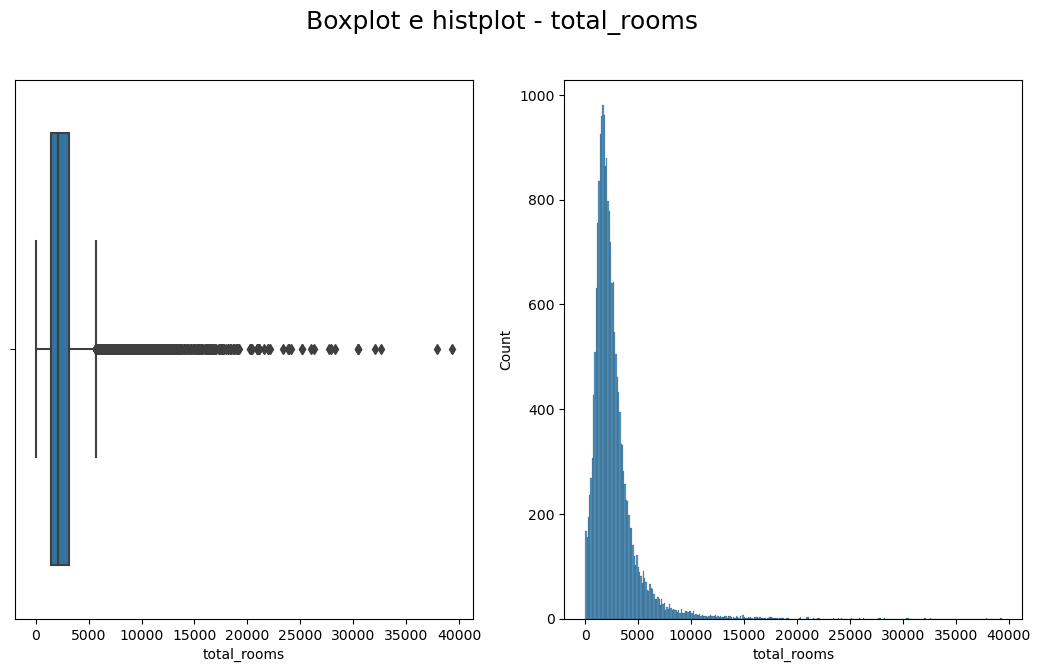

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - total_rooms', fontsize = 18)

sns.boxplot(x = df['total_rooms'], ax = ax1)
sns.histplot(x = df['total_rooms'], ax = ax2)

plt.show()

### 2.3.3) total_bedrooms

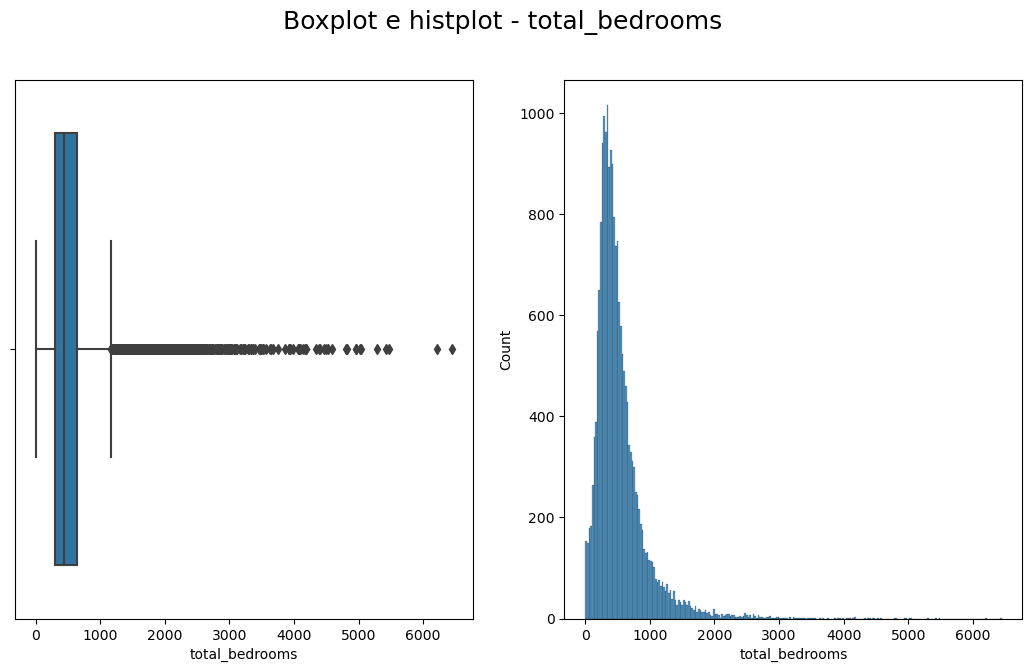

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - total_bedrooms', fontsize = 18)

sns.boxplot(x = df['total_bedrooms'], ax = ax1)
sns.histplot(x = df['total_bedrooms'], ax = ax2)

plt.show()

### 2.3.4) population

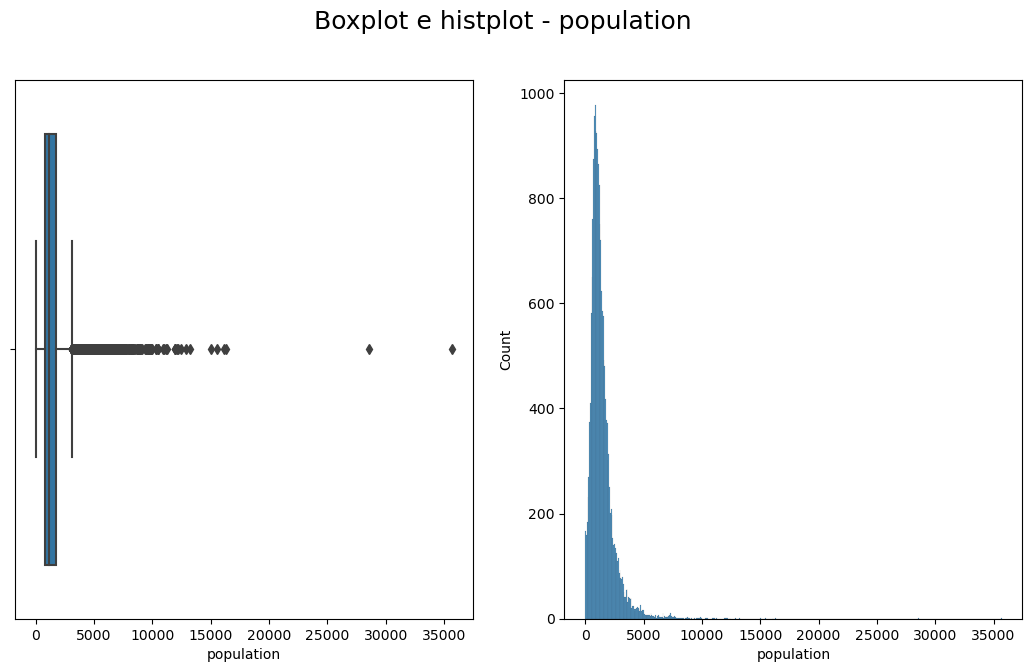

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - population', fontsize = 18)

sns.boxplot(x = df['population'], ax = ax1)
sns.histplot(x = df['population'], ax = ax2)

plt.show()

### 2.3.5) households

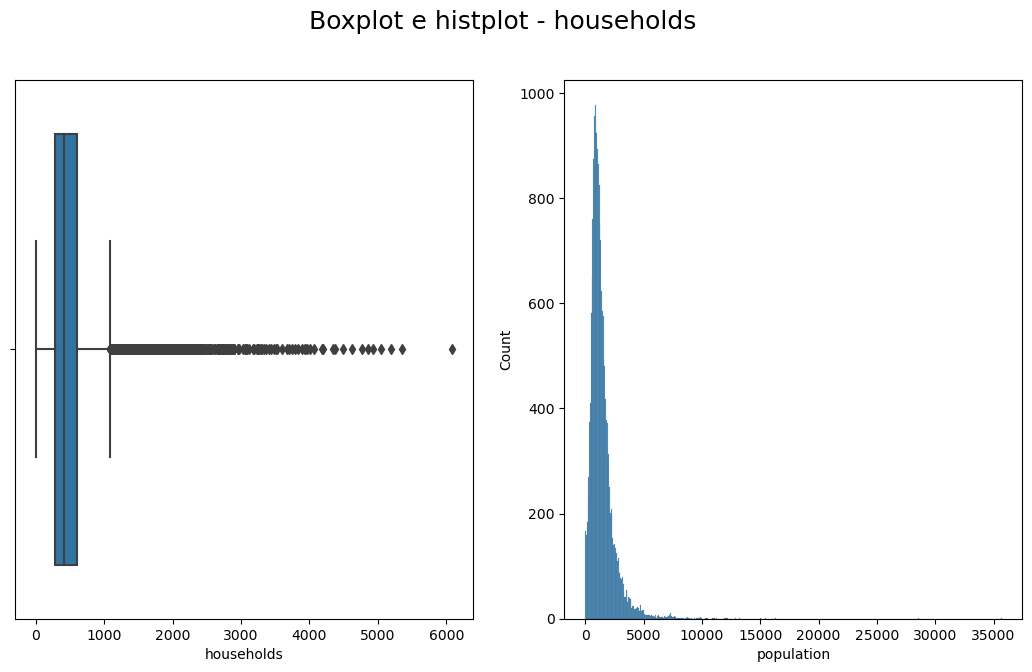

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - households', fontsize = 18)

sns.boxplot(x = df['households'], ax = ax1)
sns.histplot(x = df['population'], ax = ax2)

plt.show()

### 2.3.6) median_income

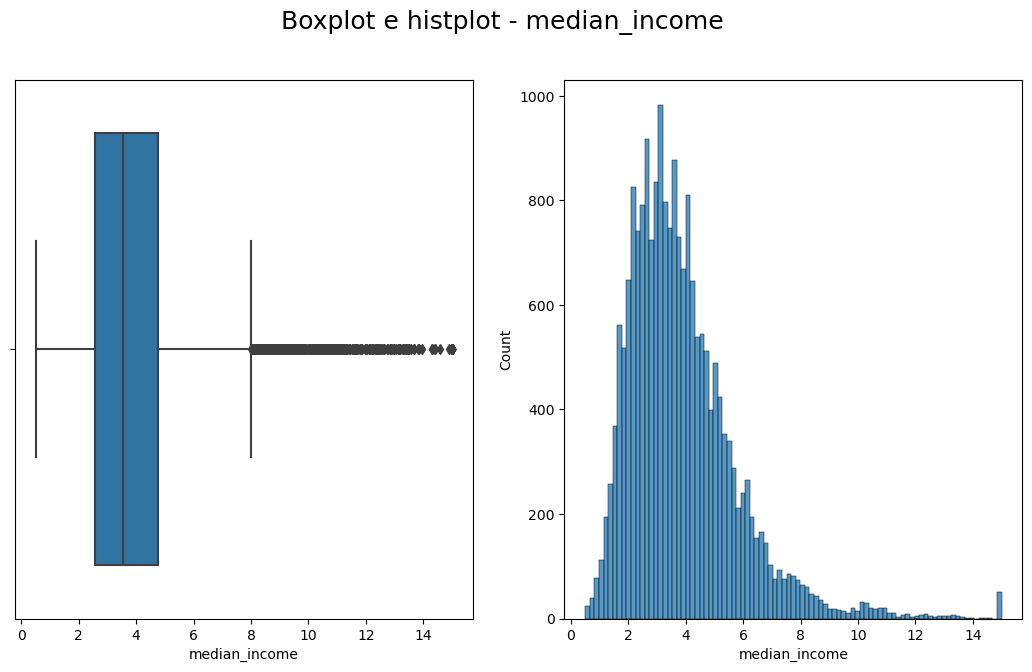

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - median_income', fontsize = 18)

sns.boxplot(x = df['median_income'], ax = ax1)
sns.histplot(x = df['median_income'], ax = ax2)

plt.show()

### 2.3.7) median_house_value

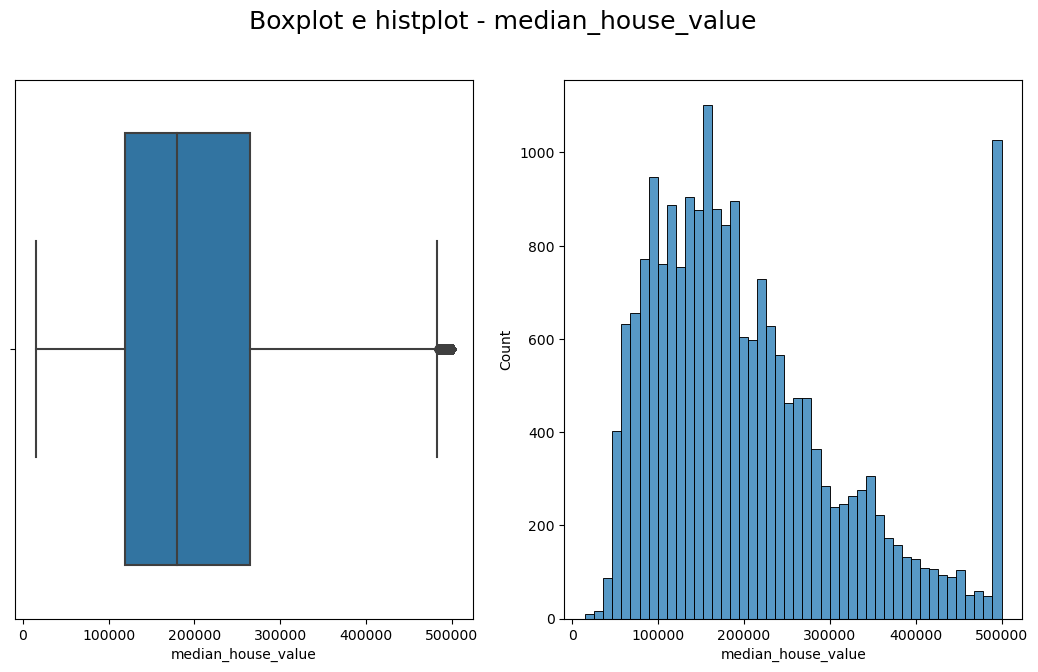

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - median_house_value', fontsize = 18)

sns.boxplot(x = df['median_house_value'], ax = ax1)
sns.histplot(x = df['median_house_value'], ax = ax2)

plt.show()

## 2.4) Correlações 

Podemos verificar nos itens anteriores que as distribuições não são homogêneas entre si, nem obedecem uma distribuição normal. Vamos verificar a correlação entre as variáveis.

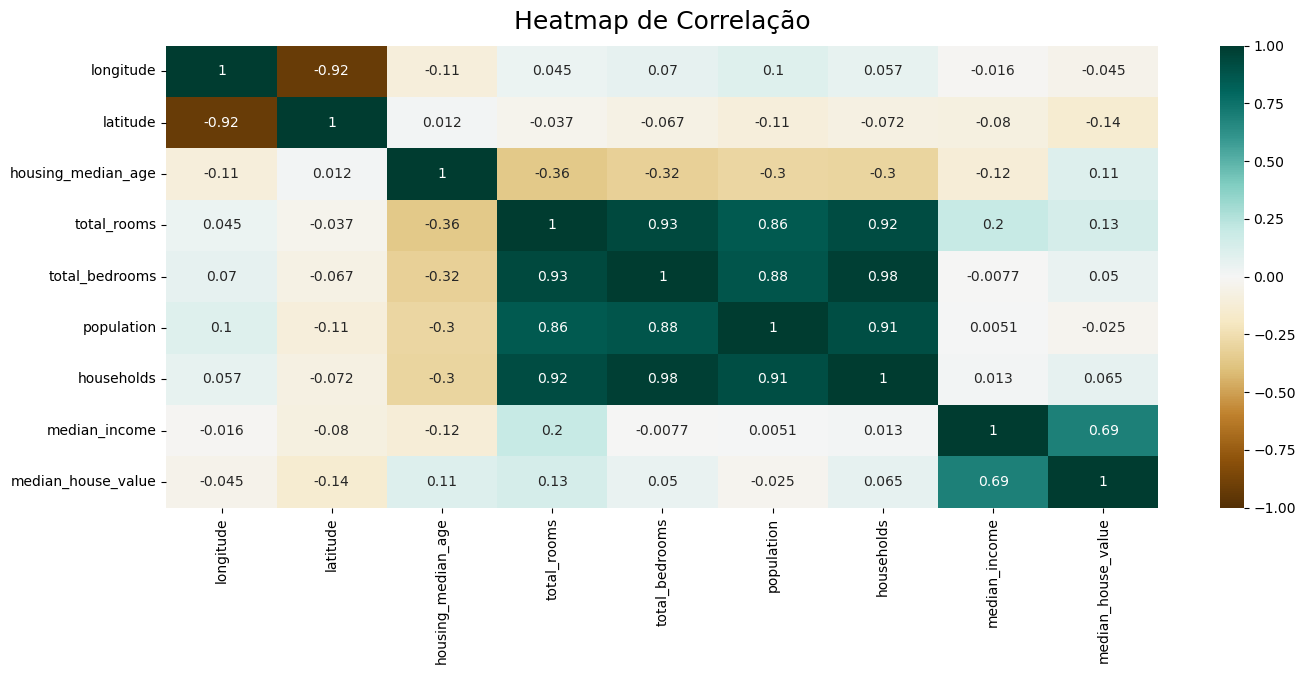

In [19]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);

Algumas observações sobre as variáveis:
* A alta correlação entre latitude e longitude é esperada, dado que se tratam de dados espaciais.
* A correlação entre total_rooms e total_bedrooms é também esperada, uma vez que uma diz respeito à quantidade de cômodos das casas e outro diz respeito à quantidade de dormitórios, que é, por sua vez, um cômodo. 
* População e agregados familiares (households) também é esperada, uma vez que uma maior concentração de pessoas é esperada se houver maior agregados e vice versa. 
* O valor da casa e da renda também tem uma correlação esperada uma vez que um poder aquisitivo maior permite comprar casas com valores mais altos e vice versa.

# 3) Feature Engineering

## 3.1) Drop de features não interessantes para Regressão

Latitude e longitude são dados espaciais. Tiro essas informações para não enviezar o modelo. A informação que pode ser relevante neste caso, é a proximidade com o mar, e isto está retratado na feature ocean_proximity.

In [20]:
df.drop(['latitude', 'longitude'], axis = 'columns', inplace = True)

## 3.2) Criação de Variáveis

### 3.2.1) `total_bedrooms` e `total_rooms`

Estas duas variáveis são altamente correlacionadas. A relação entre quantidade de dormitórios e cômodos pode ser mais interessante que as duas variáveis separadamente. Vamos criar a variável `bedrooms_per_rooms` e dropar as originais.

In [21]:
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df.drop(['total_bedrooms', 'total_rooms'], axis = 'columns', inplace = True)

### 3.2.2) `population` e `households`

Estas duas variáveis são altamente correlacionadas. A relação entre os agregados familiares e a população  pode ser mais interessante que as duas variáveis separadamente. Vamos criar a variável `household_per_population` e dropar, por enquanto, apenas `households`.

In [22]:
df['household_per_population'] = df['households'] / df['population']
df.drop(['households'], axis = 'columns', inplace = True)

### 3.2.3) `median_income` e `population`

A média de renda é afetada pela população de um distrito. A média por distrito pode ocultar algum padrão, vamos criar uma nova variável `median_incom_per_population` que é a razão entre `median_income` e `population`. Depois disso, vamos dropar a variável `population`.

In [23]:
df['median_income_per_population'] = df['median_income'] / df['population']
df.drop(['population'], axis = 'columns', inplace = True)

## 3.3) Verificação da Correlação

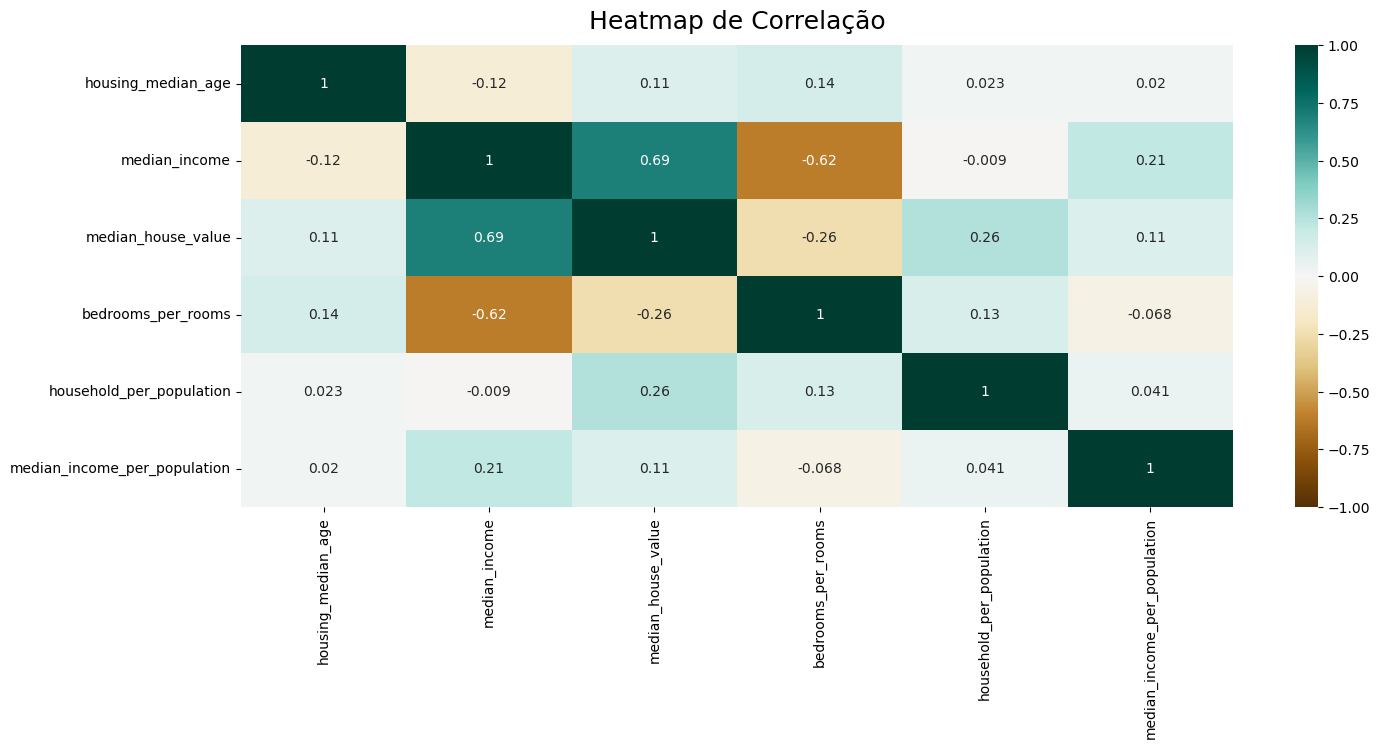

In [24]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);